# RQ1 scatter plot

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns',1000)

## get instances from csv data

In [2]:
def readCSV(filePath):
  column_names = ['index', 'eps', 
                  'abonn_type', 'abonn_time', 'abonn_visit', 'abonn_status', 'abonn_lb', 
                  'base_type', 'base_time', 'base_visit', 'base_status', 'base_lb', 
                  'ab_type', 'ab_status', 'ab_time']
  df = pd.read_csv(filePath, sep=",", header=None, names=column_names)
  return df

def readCSVconclusive(file_path):
  column_names = ['index', 'eps', 
                  'abonn_type', 'abonn_time', 'abonn_visit', 'abonn_status', 'abonn_lb', 
                  'base_type', 'base_time', 'base_visit', 'base_status', 'base_lb', 
                  'ab_type', 'ab_status', 'ab_time']
  dataframe = pd.read_csv(file_path, sep=",", header=None, names=column_names)
  conclusive = dataframe[(dataframe.base_status != 'unknown') | (dataframe.ab_status != 'unknown') | (dataframe.abonn_status != 'unknown')]
  return conclusive

## get plot data

In [3]:
def getPlotData(file_path):
    df = readCSV(file_path)
    filtered_df = df[df['abonn_status'] != 'unknown']
    time_set = filtered_df['abonn_time']
    time_ratio_set = filtered_df['base_time'] / filtered_df['abonn_time']
    return [time_set, time_ratio_set, filtered_df.abonn_status]

## make plot

In [4]:
def makePlot(file_path, y_max=None):
    # title
    if 'mnistl2.' in file_path:
        save_title = 'ml2'
    if 'mnistl4.' in file_path:
        save_title = 'ml4'
    if 'base.' in file_path:
        save_title = 'base'
    if 'deep.' in file_path:
        save_title = 'deep'
    if 'wide.' in file_path:
        save_title = 'wide'
    
    fig, ax = plt.subplots(figsize=(6.7, 5))
    data_x, data_y, status = getPlotData(file_path)

    for x, y, stat in zip(data_x, data_y, status):
      if stat == 'safe':
        marker = 'o'
        color = '#1e90ff'  # Blue
        label = 'Certified'
        ax.scatter(x, y, marker=marker, s=50, color=color, fc='none', lw=1.2, label=label)
      elif stat == 'advExample':
        marker = 'o'
        color = '#1e90ff' 
        # color = '#8B0000'  # Orange
        label = 'Violated'
        ax.scatter(x, y, marker=marker, s=50, color=color,fc='none', lw=1.2, label=label)
      else:
        marker = 'o'
        color = '#1e90ff'  # Default to blue if status is unrecognized
        label = 'Verified'
        ax.scatter(x, y, marker=marker, s=50, color=color, fc='none', lw=1.2, label=label)

    # y = 1
    ax.axhline(y=1, color='#8B0000', linestyle='solid', lw=1.5, label='Ratio=1')

    # axis label
    ax.set_xlabel('Time(s)', fontsize=20)
    ax.set_ylabel('Speedup ratio', fontsize=20, labelpad=10)
    ax.tick_params(axis='y', labelsize=20)
    ax.tick_params(axis='x', labelsize=20)

    # set y-axis upper limit if provided
    if y_max is not None:
        ax.set_ylim(top=y_max)

    # legend
    # ax.legend(fontsize=18)

    # grid
    ax.grid(ls='--', lw=0.8, color='lightgrey')

    # save
    plt.tight_layout()
    plt.savefig(f'../pdf/plot/plot_{save_title}.pdf', bbox_inches='tight')
    print('saved: ', f'../pdf/plot/plot_{save_title}.pdf')

    # show
    plt.show()

## get figure5

In [5]:
def getFig5():
    whereFile = '../csv/'
    # mnist
    # setting same y axis
    file_path_ml2 = f'{whereFile}mnistl2.csv'
    file_path_ml4 = f'{whereFile}mnistl4.csv'
    data_ml2_y = getPlotData(file_path_ml2)[1]
    data_ml4_y = getPlotData(file_path_ml4)[1]
    y_max = max(max(data_ml2_y), max(data_ml4_y)) * 1.05
    print('mnistl2')
    makePlot(file_path_ml2, y_max)
    print('mnistl4')
    makePlot(file_path_ml4, y_max)
    # cifar
    # setting same y axis
    file_path_base = f'{whereFile}base.csv'
    file_path_deep = f'{whereFile}deep.csv'
    file_path_wide = f'{whereFile}wide.csv'
    data_oval21_base = getPlotData(file_path_base)[1]
    data_oval21_deep = getPlotData(file_path_deep)[1]
    data_oval21_wide = getPlotData(file_path_wide)[1]
    y_max = max(max(data_oval21_base), max(data_oval21_deep), max(data_oval21_wide)) * 1.05
    print('base')
    makePlot(file_path_base, y_max)
    print('deep')
    makePlot(file_path_deep, y_max)
    print('wide')
    makePlot(file_path_wide, y_max)

mnistl2
saved:  ../pdf/plot/plot_ml2.pdf


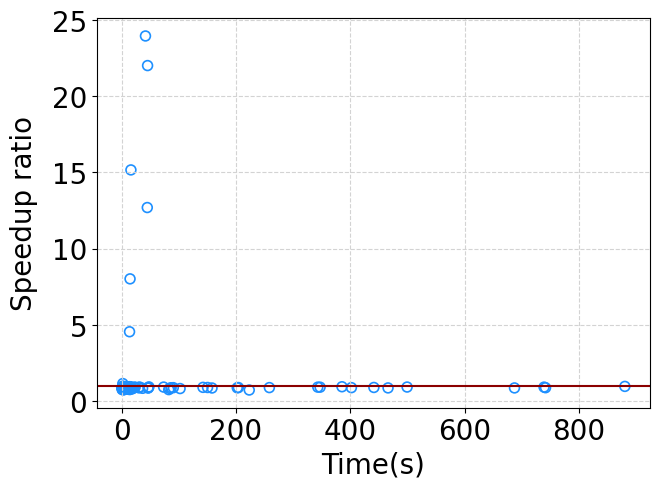

mnistl4
saved:  ../pdf/plot/plot_ml4.pdf


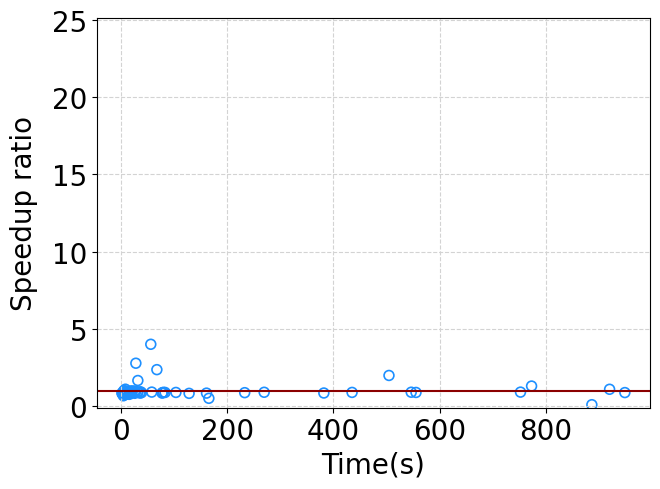

base
saved:  ../pdf/plot/plot_base.pdf


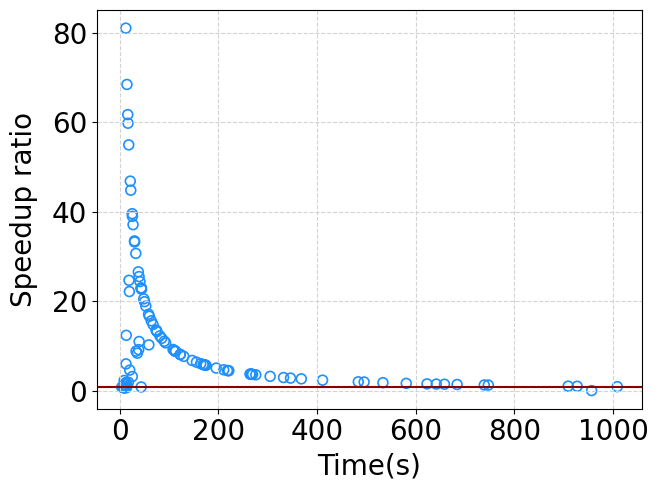

deep
saved:  ../pdf/plot/plot_deep.pdf


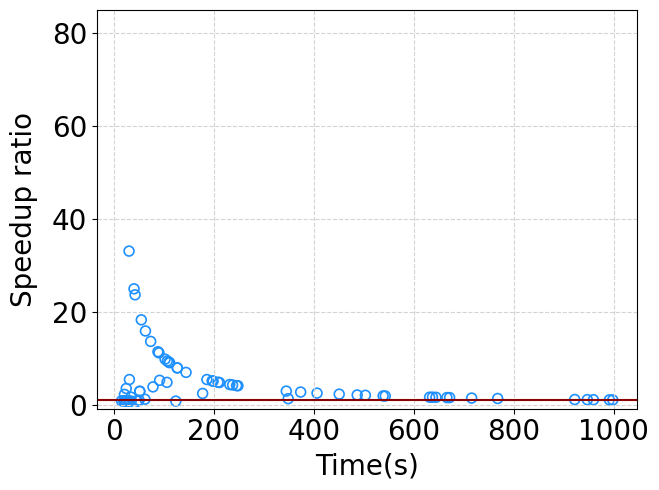

wide
saved:  ../pdf/plot/plot_wide.pdf


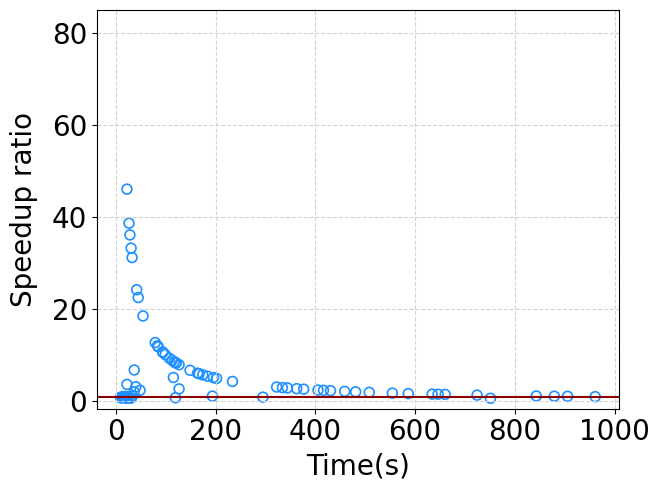

In [6]:
getFig5()